Exercise 1: Implement Simple Linear Regression

In [19]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
x=pd.read_csv('computers.csv')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [22]:
x.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [23]:
mean_value=x['Minutes'].mean()
mean_value

np.float64(97.21428571428571)

Text(0, 0.5, 'Minutes')

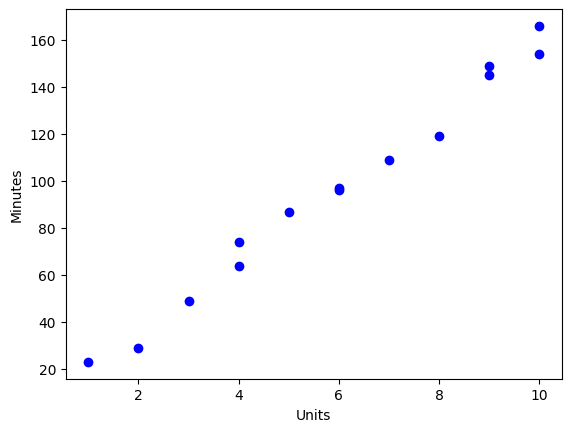

In [24]:
plt.scatter(x['Units'],x['Minutes'],color='blue')
plt.xlabel('Units')
plt.ylabel('Minutes')

create a models

In [25]:
model0 = x['Minutes'].mean()
model1 = 10+12*x['Units']
model2 = 6+18*x['Units']

In [26]:
x['model0'] = model0
x['model1'] = model1
x['model2'] = model2

In [27]:
x.columns

Index(['Units', 'Minutes', 'model0', 'model1', 'model2'], dtype='object')

In [28]:
x

,Units,Minutes,model0,model1,model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


KeyError: 'model3'

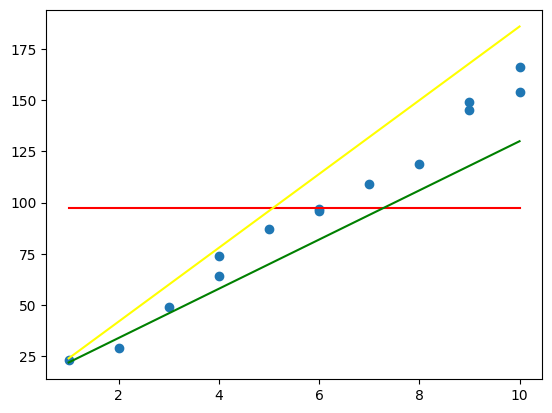

In [29]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=x, label='actual repair time')
ax.plot(x['Units'],x['model0'],color="red",label='model0')
ax.plot(x['Units'],x['model1'],color="green",label='model1')
ax.plot(x['Units'],x['model2'],color="yellow",label='model2')
ax.plot(x['Units'],x['model3'],color="blue",label='model3')
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("speculated model")
ax.legend("")

build a scikit learn model - linear regression

In [ ]:
X = x[['Units']]
Y = x['Minutes']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print("intercept:",model.intercept_)
print("Coefficient:", model.coef_)

intercept: 4.161654135338296
Coefficient: [15.50877193]


In [ ]:
model3 = 4.16+15.50*x['Units']
x['model3'] = model3


In [ ]:
x.columns

Index(['Units', 'Minutes', 'model0', 'model1', 'model2', 'model3'], dtype='object')

In [ ]:
x

,Units,Minutes,model0,model1,model2,model3
0,1,23,97.214286,22,24,19.66
1,2,29,97.214286,34,42,35.16
2,3,49,97.214286,46,60,50.66
3,4,64,97.214286,58,78,66.16
4,4,74,97.214286,58,78,66.16
5,5,87,97.214286,70,96,81.66
6,6,96,97.214286,82,114,97.16
7,6,97,97.214286,82,114,97.16
8,7,109,97.214286,94,132,112.66
9,8,119,97.214286,106,150,128.16


In [ ]:
rsq = model.score(X,Y)

In [ ]:
rsq*100

98.74371980620737

Exercise 2: Multiple Linear Regression Model

In [ ]:
s = pd.read_csv("std_marks_data.csv")
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     288 non-null    float64
 1   age       300 non-null    int64  
 2   internet  300 non-null    int64  
 3   marks     300 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [ ]:
s

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [ ]:
s.isna().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

In [ ]:
s

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [ ]:
s.hours =s.hours.fillna(s.hours.mean())

In [ ]:
s

,hours,age,internet,marks
0,6.840000,15,0,78.64
1,6.560000,20,1,88.80
2,5.494514,21,1,88.90
3,8.670000,22,1,98.99
4,7.550000,17,1,92.34
...,...,...,...,...
295,2.990000,25,0,43.45
296,6.550000,15,1,77.74
297,0.000000,20,1,75.76
298,9.900000,22,0,99.99


In [ ]:
A = s.iloc[:,:-1] 
B = s.iloc[:,-1]    

In [ ]:
A

,hours,age,internet
0,6.84,15,0
1,6.56,20,1
2,NaN,21,1
3,8.67,22,1
4,7.55,17,1
...,...,...,...
295,2.99,25,0
296,6.55,15,1
297,0.00,20,1
298,9.90,22,0


In [ ]:
B

0      78.64
1      88.80
2      88.90
3      98.99
4      92.34
       ...  
295    43.45
296    77.74
297    75.76
298    99.99
299    99.99
Name: marks, Length: 300, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,)

In [ ]:
A_train.shape



(240, 3)

In [ ]:
A_test.shape

(60, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(A_train,B_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
chd = pd.read_csv("chd_data.csv")
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
chd  # clssification problem

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


In [ ]:
chd.isna().sum()


age    0
chd    0
dtype: int64

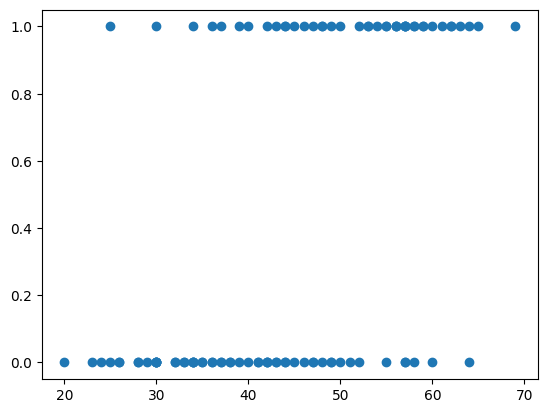

In [ ]:
plt.scatter(chd['age'], chd['chd'])

In [37]:
X = chd[['age']]
Y = chd['chd']

In [ ]:
from sklearn.linear_model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
test = int(input("enter age "))
model.predict([test])
model.score(X_test,Y_test)


# acuuracy = (TP + TN) / (TP + TN + FP + FN)
# find accuracy